## Global Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

## Reading In Dataset

In [2]:
claimsData = pd.read_csv("ClaimsData.csv")

## Glimpse Of Data

In [3]:
claimsData.shape

(458005, 16)

In [4]:
claimsData.tail()

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heart.failure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
458000,61,1,0,0,1,1,1,1,1,1,1,1,15960,3,154000,5
458001,90,1,0,0,1,1,1,1,1,1,0,0,26870,4,155010,5
458002,76,0,1,0,1,1,1,1,1,1,1,1,89140,5,155810,5
458003,82,1,0,0,1,0,1,1,1,1,1,1,20660,4,158800,5
458004,80,1,0,0,1,1,1,1,1,1,0,1,38320,4,189930,5


## Data Summary

In [6]:
claimsData.describe()

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heart.failure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
count,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000
mean,72.628401,0.192214,0.154293,0.064106,0.136071,0.213076,0.380463,0.284744,0.420063,0.161153,0.173996,0.044792,4004.963854,1.436862,4277.432823,1.522160
std,12.557114,0.394041,0.361230,0.244942,0.342864,0.409482,0.485501,0.451293,0.493569,0.367673,0.379106,0.206847,9784.064063,0.861955,8480.041283,0.870425
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,130.000000,1.000000
50%,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,950.000000,1.000000,1540.000000,1.000000
75%,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3110.000000,2.000000,4220.000000,2.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,221640.000000,5.000000,189930.000000,5.000000


## Visualizing Dependent Variable

* Bucket one consists of patients that have rather low risk.
* Bucket two has what is called emerging risk.
* In bucket three, moderate level of risk.
* Bucket four, high risk.

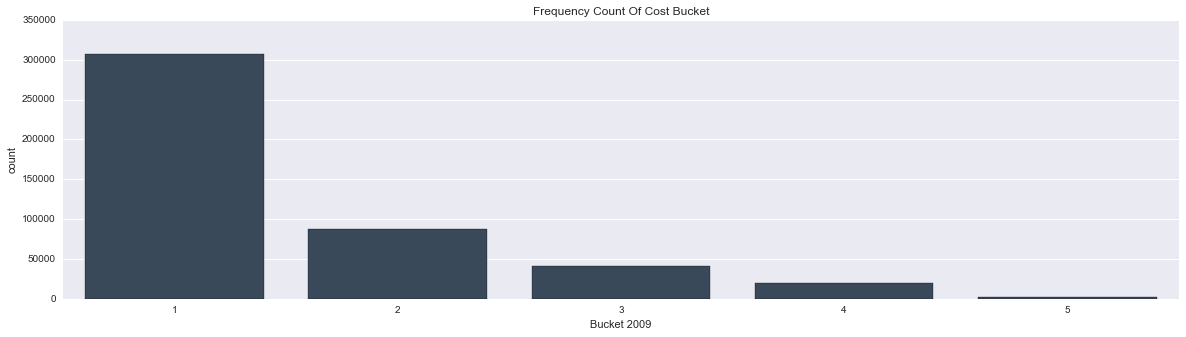

In [7]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.countplot(claimsData.bucket2009,ax=ax,color="#34495e")
ax.set(xlabel="Bucket 2009",title="Frequency Count Of Cost Bucket")

## Visualizing Age 

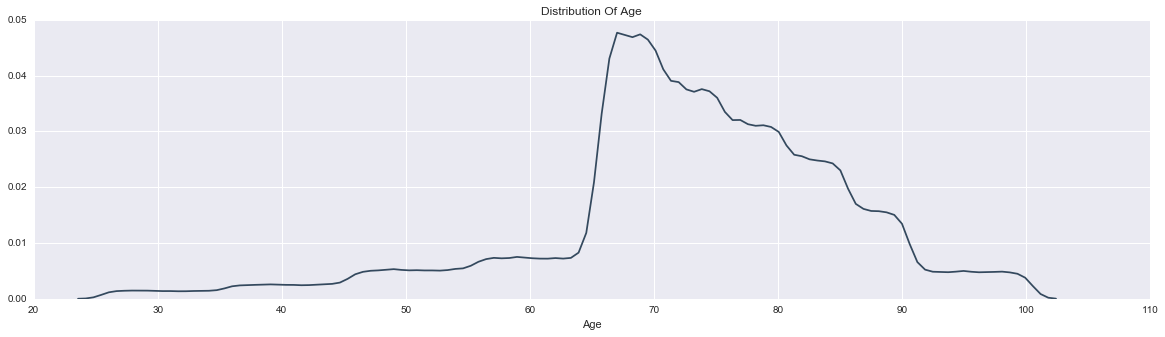

In [8]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.distplot(claimsData.age,ax=ax,color="#34495e",bins=10,hist=False)
ax.set(xlabel='Age',title="Distribution Of Age")

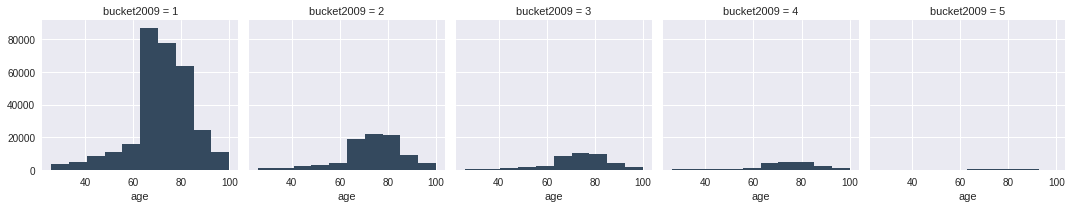

In [7]:
g = sn.FacetGrid(claimsData, col="bucket2009")
g = g.map(plt.hist, "age",color="#34495e")

## Creating Variable To Capture Illness Severity

In [13]:
claimsData["illness_count"] = claimsData.apply(lambda row: sum(row[1:12]), axis=1)
claimsData.tail()

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heart.failure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009,illness_count,illness_severity,age_group
458000,61,1,0,0,1,1,1,1,1,1,1,1,15960,3,154000,5,9,bad,50-75
458001,90,1,0,0,1,1,1,1,1,1,0,0,26870,4,155010,5,7,bad,75-100
458002,76,0,1,0,1,1,1,1,1,1,1,1,89140,5,155810,5,9,bad,75-100
458003,82,1,0,0,1,0,1,1,1,1,1,1,20660,4,158800,5,8,bad,75-100
458004,80,1,0,0,1,1,1,1,1,1,0,1,38320,4,189930,5,8,bad,75-100


## Visualizing Illness Severity

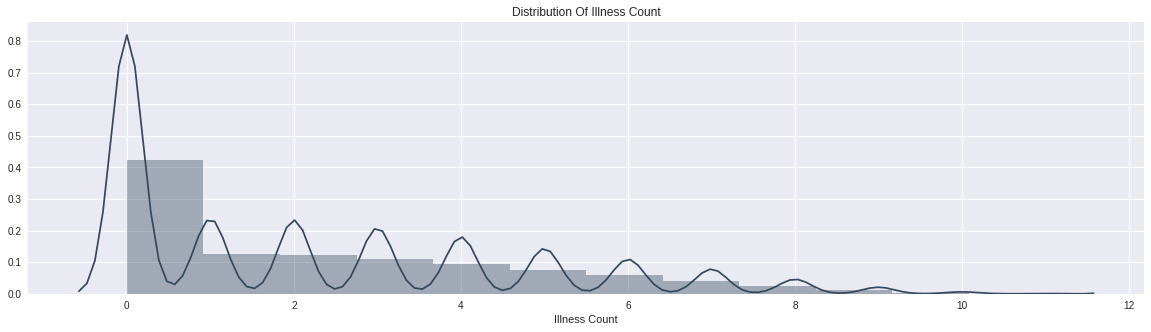

In [14]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.distplot(claimsData.illness_count,ax=ax,color="#34495e",hist=True,bins=12)
ax.set(xlabel='Illness Count',title="Distribution Of Illness Count")

## Categorizing Illness Severity And Age

In [15]:
claimsData["illness_severity"] = pd.cut(claimsData.illness_count, 2,
           labels=["medium","bad"])

claimsData["age_group"] = pd.cut(claimsData.age, 3,labels=["25-50","50-75","75-100"])
claimsData.age_group.value_counts()

50-75     240727
75-100    187450
25-50      29828
Name: age_group, dtype: int64

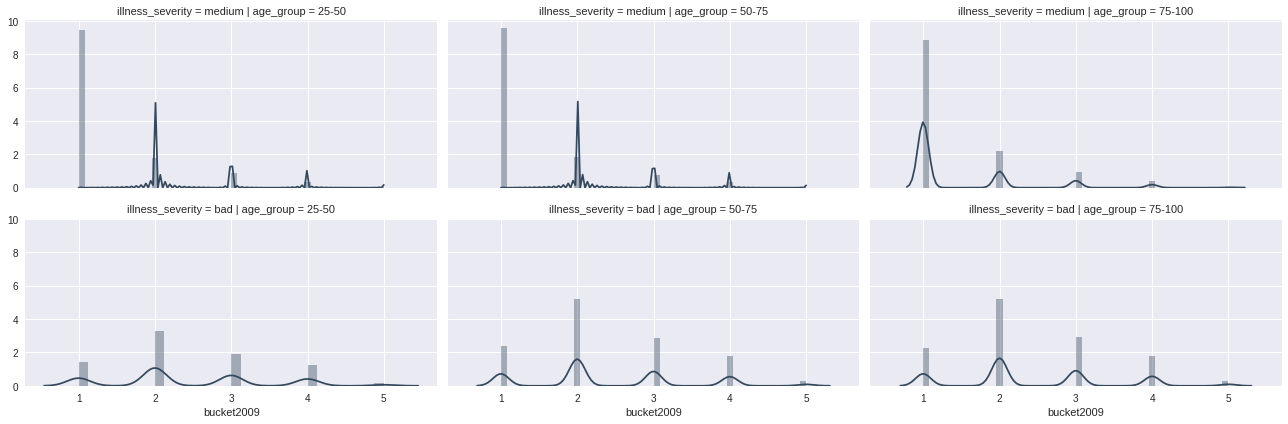

In [16]:
g = sn.FacetGrid(claimsData, col="age_group",row="illness_severity",size=3,aspect=2)
g = g.map(sn.distplot, "bucket2009",color="#34495e")

## Spliting Train And Test Dataset

In [59]:
from sklearn.model_selection import train_test_split
featureCols = ['age', 'alzheimers', 'arthritis', 'cancer', 'copd', 'depression',\
               'diabetes', 'heart.failure', 'ihd', 'kidney', 'osteoporosis', 'stroke',\
           'reimbursement2008', 'bucket2008']
train_X, test_X,train_y, test_y = train_test_split( claimsData[featureCols],\
                                    claimsData['bucket2009'],\
                                    test_size = 0.3,\
                                    random_state = 42 )

## Baseline Model

In [18]:
from sklearn import metrics
accuracy = metrics.accuracy_score( test_y, test_X.bucket2008 )
report = metrics.classification_report( test_y, test_X.bucket2008  )
print ("Accuracy Of Baseline Model: ",accuracy)
print ("\nReport Of Baseline Model: \n",report)

Accuracy Of Baseline Model:  0.683272441449

Report Of Baseline Model: 
              precision    recall  f1-score   support

          1       0.81      0.90      0.85     92083
          2       0.42      0.31      0.36     26128
          3       0.23      0.17      0.19     12492
          4       0.20      0.20      0.20      5954
          5       0.06      0.09      0.07       745

avg / total       0.65      0.68      0.66    137402



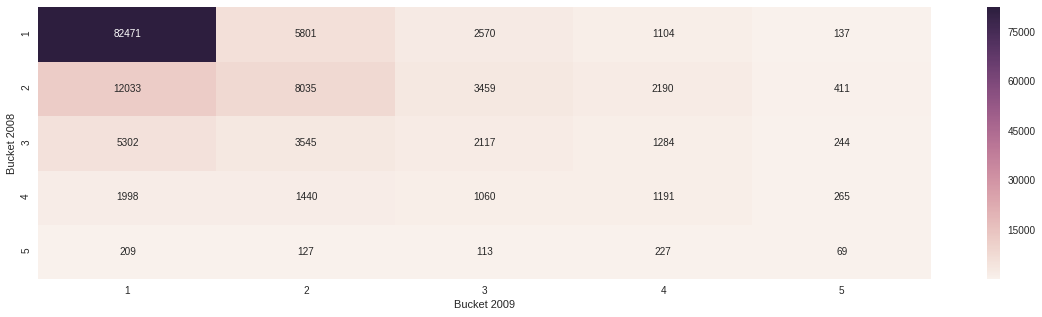

In [19]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
confusion_matrix = metrics.confusion_matrix( test_y, test_X.bucket2008 )
sn.heatmap(confusion_matrix, annot=True,  fmt='.0f',ax=ax ,xticklabels = ["1", "2","3","4","5"] , yticklabels = ["1", "2","3","4","5"] )
plt.ylabel('Bucket 2008')
plt.xlabel('Bucket 2009')

## Simple Decision Tree Model

In [42]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
simple_features  = ["arthritis","diabetes"]
clf_tree_simple = DecisionTreeClassifier(max_depth=6)
clf_tree_simple.fit( train_X[simple_features], train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Visualizing Simple Decision Tree

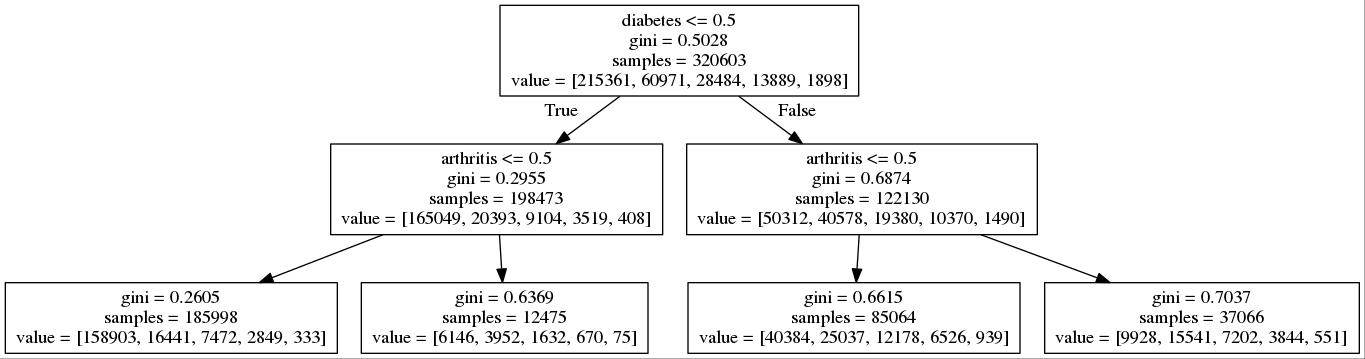

In [46]:
export_graphviz( clf_tree_simple,
                out_file = "chd_tree_simple.odt",
                feature_names = simple_features )
import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree_simple.odt' )
chd_tree_graph.write_jpg( 'chd_tree_simple.jpg')

from IPython.display import Image
Image(filename='chd_tree_simple.jpg',height = 4000,width=1000,unconfined=True)

## Evaluating Test Set

/home/vivek/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy Of Decision Tree:  0.687522743483

Report Of Decision Tree: 
              precision    recall  f1-score   support

          1       0.72      0.95      0.82     92083
          2       0.42      0.25      0.31     26128
          3       0.00      0.00      0.00     12492
          4       0.00      0.00      0.00      5954
          5       0.00      0.00      0.00       745

avg / total       0.56      0.69      0.61    137402



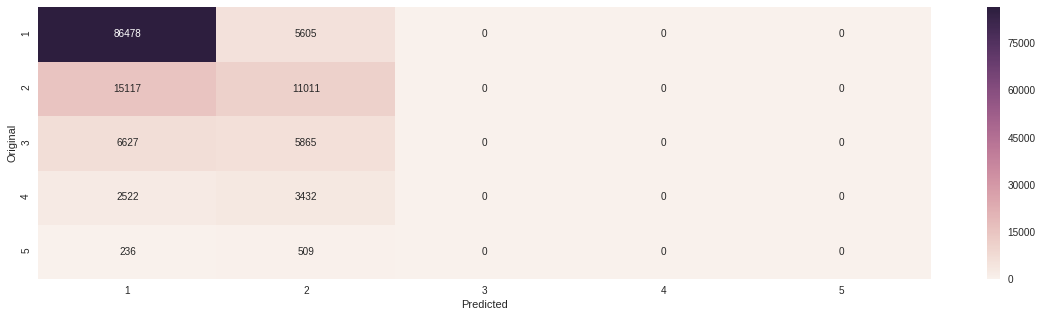

In [47]:
tree_predict_simple = clf_tree_simple.predict( test_X[simple_features] )
accuracy = metrics.accuracy_score( list(test_y), tree_predict_simple )
report = metrics.classification_report( list(test_y), tree_predict_simple )
print ("Accuracy Of Decision Tree: ",accuracy)
print ("\nReport Of Decision Tree: \n",report)

fig,ax = plt.subplots()
fig.set_size_inches(20,5)
confusion_matrix = metrics.confusion_matrix( list(test_y), tree_predict )
sn.heatmap(confusion_matrix, annot=True,  fmt='.0f',ax=ax ,xticklabels = ["1", "2","3","4","5"] , yticklabels = ["1", "2","3","4","5"] )
plt.ylabel('Original')
plt.xlabel('Predicted')

## Finding Business Rules

In [50]:
def tree_to_pseudo(tree, feature_names):

    '''
    Outputs a decision tree model as if/then pseudocode
    
    Parameters:
    -----------
    tree: decision tree model
        The decision tree to represent as pseudocode
    feature_names: list
        The feature names of the dataset used for building the decision tree
    '''

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print (indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print (indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print (indent,"}")
        else:
            print (indent,"return " + str(value[node]))

    recurse(left, right, threshold, features, 0)
business_rules_simple = tree_to_pseudo(clf_tree_simple,simple_features)
print(business_rules_simple)

 if ( diabetes <= 0.5 ) {
   if ( arthritis <= 0.5 ) {
     return [[ 158903.   16441.    7472.    2849.     333.]]
   } else {
     return [[ 6146.  3952.  1632.   670.    75.]]
   }
 } else {
   if ( arthritis <= 0.5 ) {
     return [[ 40384.  25037.  12178.   6526.    939.]]
   } else {
     return [[  9928.  15541.   7202.   3844.    551.]]
   }
 }
None


## Decision Tree Model

In [20]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
clf_tree = DecisionTreeClassifier(max_depth=6)
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Visualizing Decision Trees

In [23]:
export_graphviz( clf_tree,
                out_file = "chd_tree.odt",
                feature_names = train_X.columns )
import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' )
chd_tree_graph.write_jpg( 'chd_tree.jpg')

True

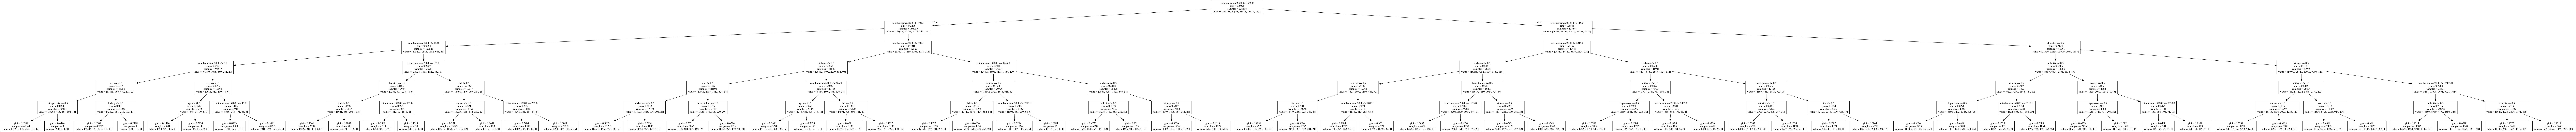

In [24]:
from IPython.display import Image
Image(filename='chd_tree.jpg',height = 4000,width=3000,unconfined=True)

## Feature Importance

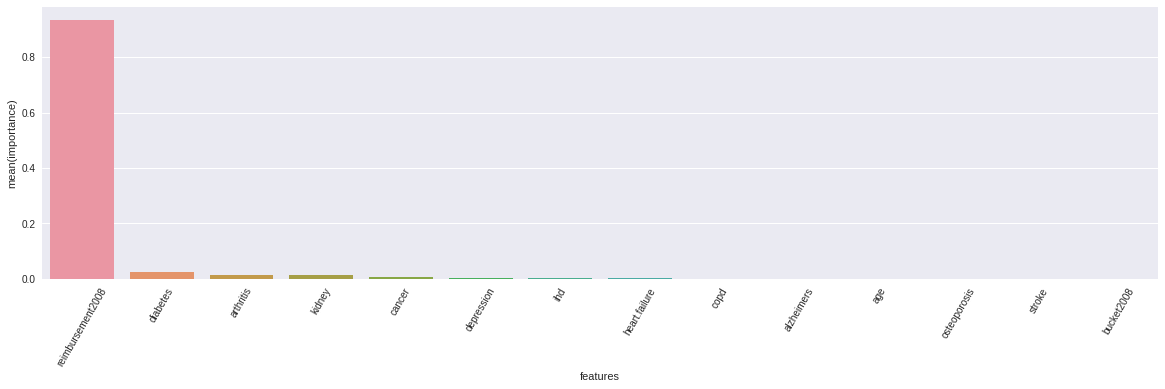

In [22]:
features = pd.DataFrame()
features['features'] = featureCols
features['importance'] = clf_tree.feature_importances_
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
plt.xticks(rotation=60)
sn.barplot(data=features.head(30),x="features",y="importance",ax=ax,orient="v")

## Evaluating Test Dataset

In [25]:
tree_predict = clf_tree.predict( test_X )
accuracy = metrics.accuracy_score( list(test_y), tree_predict )
report = metrics.classification_report( list(test_y), tree_predict )
print ("Accuracy Of Decision Tree: ",accuracy)
print ("\nReport Of Decision Tree: \n",report)

Accuracy Of Decision Tree:  0.709516600923

Report Of Decision Tree: 
              precision    recall  f1-score   support

          1       0.78      0.94      0.85     92083
          2       0.42      0.42      0.42     26128
          3       0.00      0.00      0.00     12492
          4       0.00      0.00      0.00      5954
          5       0.00      0.00      0.00       745

avg / total       0.60      0.71      0.65    137402



/home/vivek/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


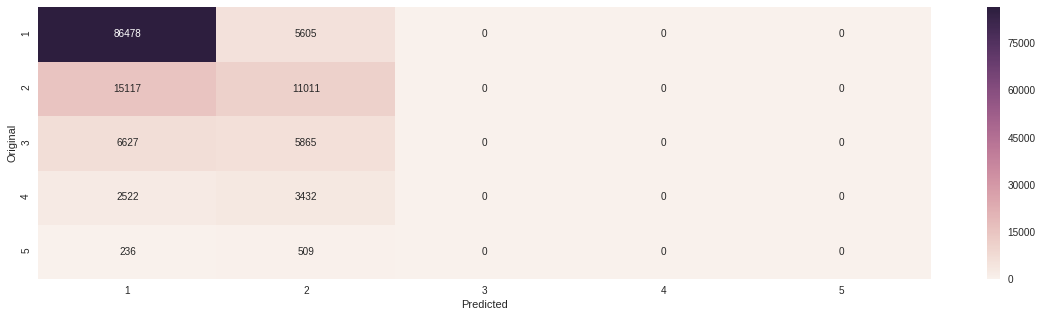

In [26]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
confusion_matrix = metrics.confusion_matrix( list(test_y), tree_predict )
sn.heatmap(confusion_matrix, annot=True,  fmt='.0f',ax=ax ,xticklabels = ["1", "2","3","4","5"] , yticklabels = ["1", "2","3","4","5"] )
plt.ylabel('Original')
plt.xlabel('Predicted')

## Gradient Boost Model

/home/vivek/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy Of Gradient Boost:  0.709502045094

 Report Of Gradient Boost: 
              precision    recall  f1-score   support

          1       0.77      0.95      0.85     92083
          2       0.42      0.38      0.40     26128
          3       0.00      0.00      0.00     12492
          4       0.00      0.00      0.00      5954
          5       0.00      0.00      0.00       745

avg / total       0.60      0.71      0.65    137402


 Misclassfication Cost:  17.0946128877


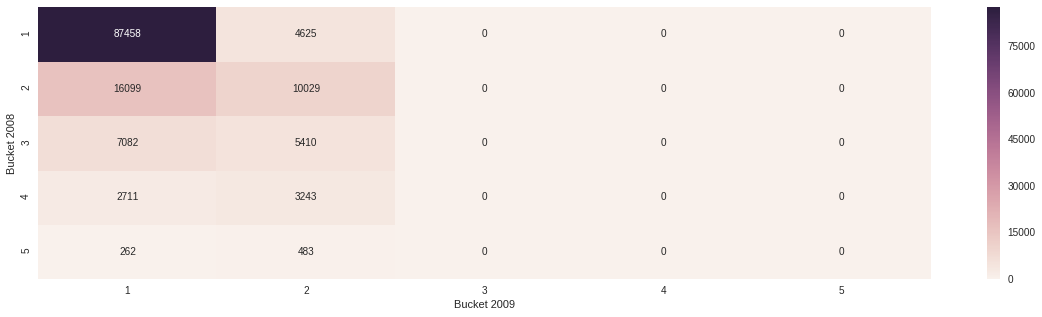

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

reduced_features = ["reimbursement2008","diabetes","cancer","arthritis","kidney"]

gbm_model = GradientBoostingClassifier(n_estimators=10)
gbm_model.fit( train_X[reduced_features], train_y )
gbm_predict = gbm_model.predict(X= test_X[reduced_features])

accuracy = metrics.accuracy_score( list(test_y), gbm_predict )
report = metrics.classification_report( list(test_y), gbm_predict )
misclass_cost = penalty(list(test_y), gbm_predict)

print ("Accuracy Of Gradient Boost: ",accuracy)
print ("\n Report Of Gradient Boost: \n",report)
print ("\n Misclassfication Cost: ",misclass_cost)

fig,ax = plt.subplots()
fig.set_size_inches(20,5)
confusion_matrix = metrics.confusion_matrix( list(test_y), gbm_predict )
sn.heatmap(confusion_matrix, annot=True,  fmt='.0f',ax=ax ,xticklabels = ["1", "2","3","4","5"] , yticklabels = ["1", "2","3","4","5"] )
plt.ylabel('Bucket 2008')
plt.xlabel('Bucket 2009')

## Custom Evaluation Metric

In [67]:
penalty_matrix = np.matrix( ((0,1,2,3,4), (2,0,1,2,3), (4,2,0,1,2),(6,4,2,0,1),(8,6,4,2,0)) )
penalty_matrix

matrix([[0, 1, 2, 3, 4],
        [2, 0, 1, 2, 3],
        [4, 2, 0, 1, 2],
        [6, 4, 2, 0, 1],
        [8, 6, 4, 2, 0]])

In [62]:
from sklearn.metrics import make_scorer

def penalty(original,preds):
    penalty_matrix = np.matrix( ((0,1,2,3,4), (2,0,1,2,3), (4,2,0,1,2),(6,4,2,0,1),(8,6,4,2,0)) )
    confusion_matrix = np.matrix(metrics.confusion_matrix( original, preds ))
    misclass_matrix = penalty_matrix*confusion_matrix  
    return misclass_matrix.sum()/len(preds)

penalty_scorer = make_scorer(penalty,greater_is_better=False)
penalty_scorer

make_scorer(penalty, greater_is_better=False)

## Gradient Boost With Custom Metric

/home/vivek/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy Of Gradient Boost:  0.710229836538

Report Of Gradient Boost: 
              precision    recall  f1-score   support

          1       0.77      0.95      0.85     92083
          2       0.42      0.40      0.41     26128
          3       0.00      0.00      0.00     12492
          4       0.00      0.00      0.00      5954
          5       0.00      0.00      0.00       745

avg / total       0.60      0.71      0.65    137402


 Misclassfication Cost:  17.0946128877


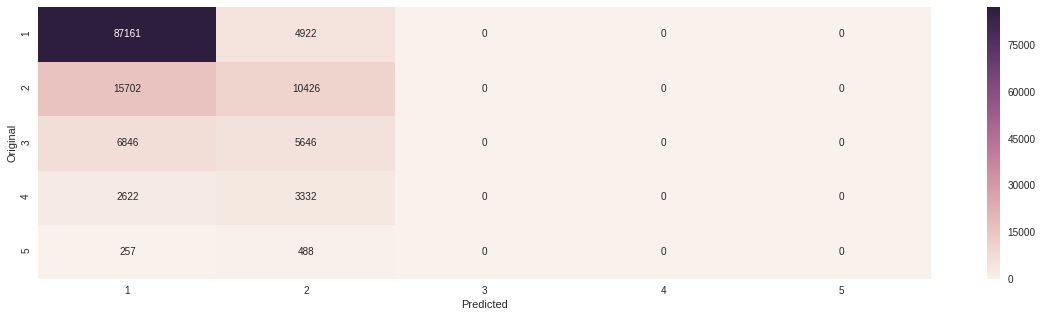

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


reduced_features = ["reimbursement2008","diabetes","cancer","arthritis","kidney"]

gbm_model = GradientBoostingClassifier()
gbm_params = { 'n_estimators':[10,20,30,40],"max_depth":[2,3,4,5],"min_sample":[20,30,40,50]}
grid_gbm = GridSearchCV( gbm_model,gbm_params,scoring = penalty_scorer,cv=2)

grid_gbm.fit( train_X, train_y )
gbm_grid_predict = grid_gbm.predict(X= test_X)

accuracy = metrics.accuracy_score( list(test_y), gbm_grid_predict )
report = metrics.classification_report( list(test_y), gbm_grid_predict )
misclass_cost = penalty(list(test_y), gbm_grid_predict)

fig,ax = plt.subplots()
fig.set_size_inches(20,5)
confusion_matrix = metrics.confusion_matrix( list(test_y), gbm_grid_predict )
sn.heatmap(confusion_matrix, annot=True,  fmt='.0f',ax=ax ,xticklabels = ["1", "2","3","4","5"] , yticklabels = ["1", "2","3","4","5"] )
plt.ylabel('Original')
plt.xlabel('Predicted')


print ("Accuracy Of Gradient Boost: ",accuracy)
print ("\nReport Of Gradient Boost: \n",report)
print ("\n Misclassfication Cost: ",misclass_cost)